在进行绘图时，在Ipython中会自动打开一个窗口显示绘图，而要在Jupyter NoteBook中显示绘图，需先执行以下命令：
> %matplotlib notebook

## 1. 图象对象Figure和Subplot
- matplotlib的图像都位于一个画板对象中，这个画板还不能直接绘图，需要再画板建立子画板，然后在子画板上进行绘图
- 画板对象就是Figure对象，可以使用`plt.figure()`进行创建；子画板是Subplot对象，在Figure对象上使用`add_subplot()`来创建一个或多个Subplo对象
- 在使用`plt.plot()`进行绘图时，如果还没有创建Subplot对象或者Figure对象，则会自动建立Figure对象和Subplot对象；如果已经创建了对象，或创建了多个Subplot对象，则会在最后一个Subplot对象上绘图
- 使用Subplot对象调用`plot()`方法可以在该Subplot对象上进行绘图  
  
`add_subplot(x,y,z)` 创建subplot，将画板分为x行y列，z为新建的subplot所在位置（z不能大于x*y），(2,3,4)表示将画板划分为2行3列，子画板位于第4个位置（从左至右、从上往下顺序），可以简写为(234)

In [1]:
%matplotlib notebook

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


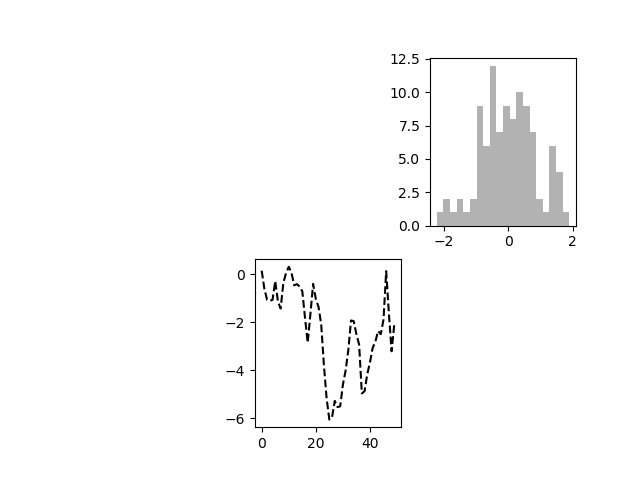

In [3]:
# 建立一个figure
fig=plt.figure()

In [4]:
# figure分为2行3列，在第3个位置建立一个subplot
ax1=fig.add_subplot(233)

In [5]:
# 再建立第二个subplot
ax2=fig.add_subplot(235)

In [6]:
# 使用plot绘图时，默认使用最后一个用过的subplot
plt.plot(np.random.randn(50).cumsum(), 'k--')

In [7]:
# 在ax1里绘图
ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.3)

(array([ 1.,  2.,  1.,  2.,  1.,  2.,  9.,  6., 12.,  7.,  9.,  8., 10.,
         9.,  7.,  2.,  1.,  6.,  4.,  1.]),
 array([-2.22686684, -2.02052149, -1.81417614, -1.60783079, -1.40148544,
        -1.19514009, -0.98879474, -0.78244939, -0.57610404, -0.36975869,
        -0.16341334,  0.04293201,  0.24927736,  0.45562271,  0.66196806,
         0.86831341,  1.07465876,  1.28100411,  1.48734946,  1.69369481,
         1.90004016]),
 <a list of 20 Patch objects>)

`plt.subplots(x,y)` 直接创建一个包含x*y个Subplot的Figure，并返回Figure和包含Subplot的Numpy数组对象，该数组里的Subplot可以直接使用索引方式来访问

<IPython.core.display.Javascript object>


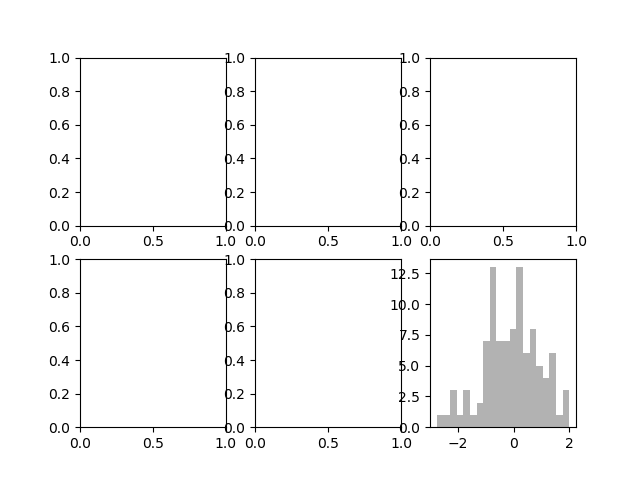

In [8]:
# 创建一个包含2行3列subplot的figure，axes是包含Subplot的Numpy数组对象
fig,axes=plt.subplots(2,3)

In [9]:
# 直接使用索引方式可以访问axes里的subplot，axes[1,2]表示第2行第3个subplot
axes[1,2].hist(np.random.randn(100), bins=20, color='k', alpha=0.3)

(array([ 1.,  1.,  3.,  1.,  3.,  1.,  2.,  7., 13.,  7.,  7.,  8., 13.,
         6.,  8.,  5.,  4.,  6.,  1.,  3.]),
 array([-2.77005056, -2.53159581, -2.29314106, -2.05468631, -1.81623156,
        -1.57777681, -1.33932206, -1.10086731, -0.86241257, -0.62395782,
        -0.38550307, -0.14704832,  0.09140643,  0.32986118,  0.56831593,
         0.80677068,  1.04522543,  1.28368018,  1.52213493,  1.76058967,
         1.99904442]),
 <a list of 20 Patch objects>)

**subplots参数说明**
![title](img/subplot.png)

## 2. Subplot布局调整
`subplots_adjust()` 调整subplot的布局  
参数  
- `left` `right` `bottom` `top` 分别指定subplots的左右下上的位置百分比
- `wspace` `hspace` 指定subplot之间间距的宽度和高度百分比

<IPython.core.display.Javascript object>


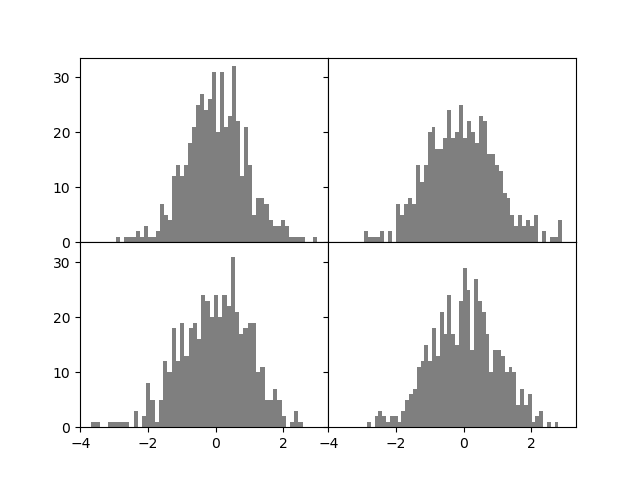

In [10]:
# 创建一个2*2的绘图区域，sharex，sharey表示所有subplot使用相同的X和Y轴刻度
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
# 循环访问每个subplot并绘图
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins=50, color='k', alpha=0.5)

In [11]:
# 设置subplot之间高度和宽度均为0
plt.subplots_adjust(wspace=0, hspace=0)

## 3. 颜色、标记、线型和图例
`plot()`方法可以通过参数来自定义显示的颜色、标记、线型，可通过`plt.plot?`来查阅各项的可用值  
- `color` 颜色，可以使用颜色缩写，也可以使用颜色码如`#CCFF00`
- `marker` 标记，每个数据点的标记样式，可以使用文字描述也可以使用符号定义
- `linestyle` 线型
> 颜色、标记、线型可根据需要不设置或者设置一项或多项  
这3样设置也可以缩写在一个字符串内，顺序为'颜色标记线型'，如`ro--`表示`color='r',marker='o',linestyle='--'`

- `label` 标签，可在图例中显示

`legend()` 显示plot图例，参数`loc`用来指定图例显示位置，可使用文字描述或对应的数字代码，默认`upper right`

<IPython.core.display.Javascript object>


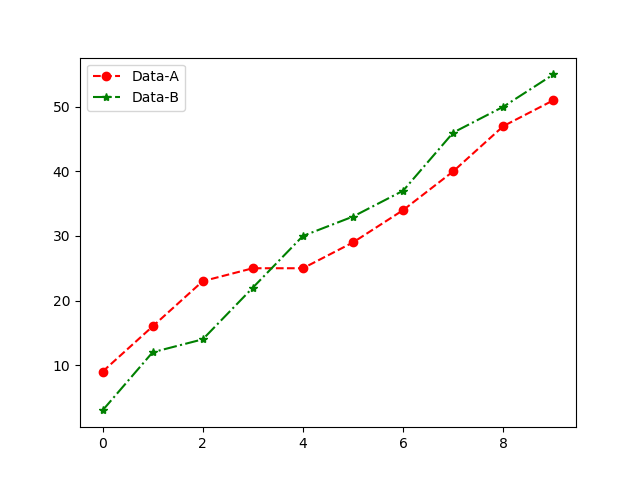

In [12]:
fig=plt.figure()
ax=fig.add_subplot(111)

In [13]:
# 该设置等价于ax.plot(np.random.randint(10, size=10).cumsum(),'ro--')
ax.plot(np.random.randint(10, size=10).cumsum(), color='r',
        marker='o', linestyle='--', label='Data-A')

In [14]:
# 再添加一个Data-B
ax.plot(np.random.randint(10, size=10).cumsum(), 'g*-.', label='Data-B')

In [15]:
# 显示图例
ax.legend(loc='best')

## 4. 刻度、标签和图例
主要有两种方法，一种是使用pyplot接口的方法，另外一种是使用subplot对象的方法。  
**pyplot接口方法**  
- `xlim()` 控制x轴刻度范围，使用数组表示范围
- `xticks()` x轴刻度标签位置，使用数组表示每个标签的位置
- `xticklabels()` x轴刻度标签内容，使用数组表示每个标签内容 
> 方法中带参数表示按参数值对相应项目进行设置，不带参数表示返回该项目的设置值

**subplot对象方法（建议使用该方法）**  
- `get_xlim()` `set_xlim()` 获取或设置x轴刻度范围
- `get_xticks()` `set_xticks()` 获取或设置x轴刻度标签位置
- `get_xticklabels()` `set_xticklabels()` 获取或设置x轴刻度标签内容
> 以上所有方法都是针对x轴进行设置，如果需要对y轴设置，只需把方法名中的`x`替换为`y`即可  
**注意：**如果使用`plt.subplots()`创建一组subplots，且设置了`sharex=True`或`sharey=True`，那么针对任意subplot的轴设置均会影响到其他subplots的轴。

<IPython.core.display.Javascript object>


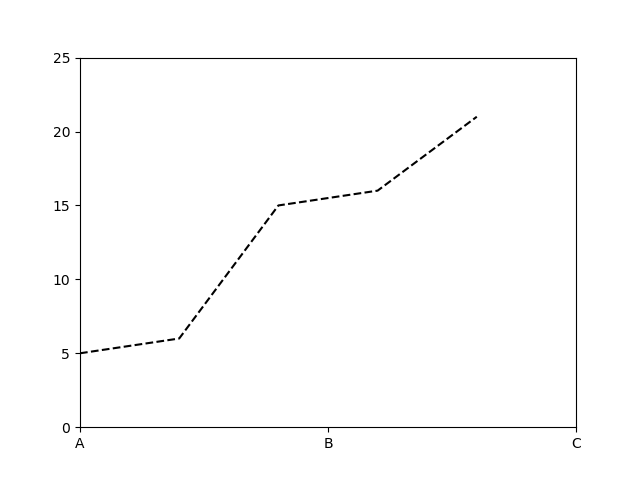

In [16]:
fig=plt.figure()
ax=fig.add_subplot(111)
ax.plot(np.random.randint(10,size=5).cumsum(), 'k--')

In [17]:
# 使用pyplot接口获取x，y轴范围
print('图形的x轴范围是%s，y轴范围是%s'%(str(plt.xlim()),str(plt.ylim())))

图形的x轴范围是(-0.2, 4.2)，y轴范围是(4.2, 21.8)


In [18]:
# 使用subplot对象方法设置x，y轴范围
ax.set_xlim([0,5])
ax.set_ylim([0,25])

(0, 25)

In [19]:
# 设置x轴标签所显示的位置
ax.set_xticks([0,2.5,5])

In [20]:
# 设置x轴标签内容，若内容数量大于标签位置的数量，多出的标签就不显示
ax.set_xticklabels(list('ABCDEF'))

[Text(0,0,'A'), Text(0,0,'B'), Text(0,0,'C')]